<img src='all.png'>

# Binning
While working with numeric data we come across some features where distributions of variables are skewed in the sense that some sets of values will occur a lot and some will be very rare. Directly using this type of feature may cause issues or can give inaccurate results.
<img src='binning.jpeg'>

Binning is a way to convert numerical continuous variables into discrete variables by categorizing them on the basis of the range of values of the column in which they fall. In this type of transformation, we create bins. Each bin allows a specific range of continuous numerical values. It prevents overfitting and increases the robustness of the model.

Let’s understand this using an example. We have scores of 10 students as 35, 46, 89, 20, 58, 99, 74, 60, 18, 81. Our task is to make 3 teams. Team 1 will have students with scores between 1-40, Team 2 will have students with scores between 41-80, and Team 3 will have students with scores between 81-100.
<img src='teams.jpeg'>

#### Binning can be done in different ways listed below.

    -> Fixed – Width Binning
    -> Quantile Binning
    -> Binning by Instinct
      
### 1. Fixed – Width Binning
Just like the name indicates, in fixed-width binning, we have specific fixed widths for each of the bins which are usually pre-defined by the user analyzing the data. Each bin has a pre-fixed range of values that should be assigned to that bin on the basis of some domain knowledge, rules, or constraints.

Let’s take an example to understand it better, we can group a person’s age interval to 10 years(decades). 0-  9 years will be in bin-1, 10-19 in bin-2 similarly 20-29 in bin-3

<img src='eq_width.jpeg'>

### 2. Quantile Binning
If there are a large number of gaps in the range of numerical feature fix-width binning will not be that effective, there will be many empty bins with no data. In such cases binning is done on the basis of quantile distribution.

Quantiles divide data into equal portions. The Median divides data into two parts, half of the data is smaller than the median, and half of the data is large than the median. Quartiles divide into quarters and deciles into tenth etc.

<img src='quantile_binning.png'>

 ### 3. Binning by Instinct
This actually involves a manual process of binning manually based on your own personal insight of the data and setting ranges we would like to bin our data into.

Let’s take an example  to understand it better, we can group a person’s age into interval where 1-18 falls under a minor, 19- 29 under young, 30-49 under old, and 50-100 in very old.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
Crickters = {'Name':['Virat', 'Rohit', 'Babar', 'Boult', 'Bumrah', 'Mujeeb', 'Nabi', 'Strokes'],
             "Age":[31,33,25,31,26,19,35,29],
              'Role':['batsman','batsman','batsman','Bowler','Bowler','Bowler','All-Rounder','All-Rounder'],
              'Rating':[871,855,829,722,719,701,301,285],
              'Country':['IND','IND','PAK','NZ','IND','AFG','AFG','ENG']
             } 

In [3]:
Crickters = pd.DataFrame(Crickters)
Crickters

,Name,Age,Role,Rating,Country
0,Virat,31,batsman,871,IND
1,Rohit,33,batsman,855,IND
2,Babar,25,batsman,829,PAK
3,Boult,31,Bowler,722,NZ
4,Bumrah,26,Bowler,719,IND
5,Mujeeb,19,Bowler,701,AFG
6,Nabi,35,All-Rounder,301,AFG
7,Strokes,29,All-Rounder,285,ENG


In [4]:
bins = np.linspace(Crickters.Age.min(), Crickters.Age.max(), 4) # Fixed – Width Binning
bins

array([19.        , 24.33333333, 29.66666667, 35.        ])

In [5]:
Label_lst = ['Young', 'Senior' , 'Super_Senior']

In [6]:
Crickters['bins'] = pd.cut(Crickters.Age, bins, labels =Label_lst, include_lowest = True)

In [7]:
Crickters

,Name,Age,Role,Rating,Country,bins
0,Virat,31,batsman,871,IND,Super_Senior
1,Rohit,33,batsman,855,IND,Super_Senior
2,Babar,25,batsman,829,PAK,Senior
3,Boult,31,Bowler,722,NZ,Super_Senior
4,Bumrah,26,Bowler,719,IND,Senior
5,Mujeeb,19,Bowler,701,AFG,Young
6,Nabi,35,All-Rounder,301,AFG,Super_Senior
7,Strokes,29,All-Rounder,285,ENG,Senior


<AxesSubplot:>

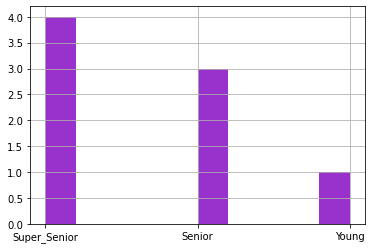

In [18]:
Crickters.bins.hist(color='darkorchid')

<AxesSubplot:>

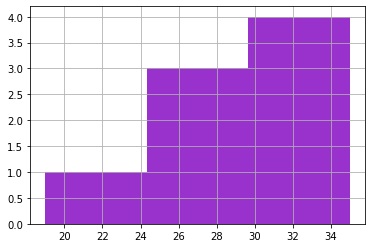

In [19]:
Crickters.Age.hist(bins= bins, color='darkorchid')